In [4]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

(256, 256, 176)


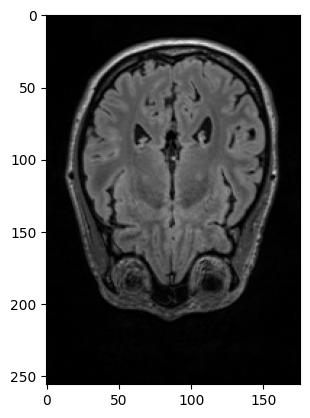

In [10]:
data_itk = sitk.ReadImage('/localmount/volume-hd/users/uline/data_sets/CVD/0a3a5d79-a26c-4aea-99f4-892751d2baa7/FLAIR.nii.gz')
flair1 = sitk.GetArrayFromImage(data_itk)
print(flair1.shape)

plt.imshow(flair1[150,:,:],cmap='gray')
plt.show()

Input Orientation: SAL
(256, 256, 176)


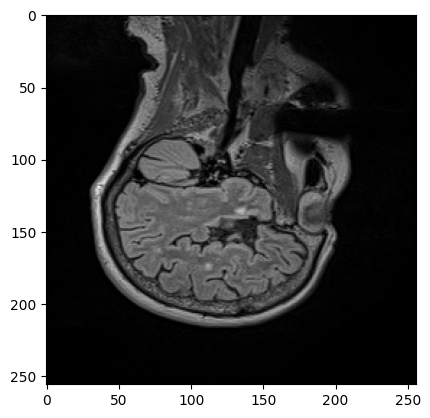

In [62]:
input1_orientation = sitk.DICOMOrientImageFilter_GetOrientationFromDirectionCosines(data_itk.GetDirection())
print(f"Input Orientation: {input1_orientation}")
oriented_img1 = sitk.DICOMOrient(data_itk, desiredCoordinateOrientation='RAS')
flair1 = sitk.GetArrayFromImage(oriented_img1)
print(flair1.shape)

plt.imshow(flair1[:,:,50],cmap='gray')
plt.show()

sitk.WriteImage(oriented_img1, 'test.nii.gz')


In [56]:
data_itk = sitk.ReadImage('test.nii.gz')
flair1 = sitk.GetArrayFromImage(data_itk)
print(flair1.shape)

(176, 256, 256)


(0.9983192787857195, -0.006911737522344152, 0.057539946253373206, 0.0016663263262474777, -0.9890287724066649, -0.14771359882289867, -0.05792962075946563, -0.14756122538183106, 0.9873549753295148)
(256, 256, 176)


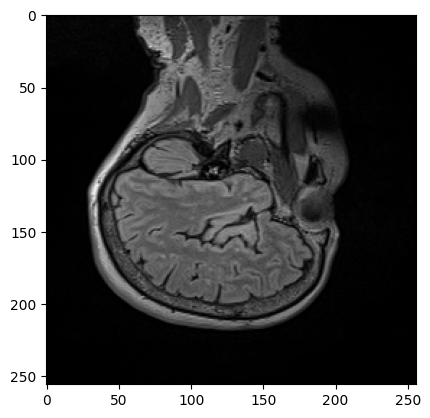

In [43]:
data_itk = sitk.ReadImage('/localmount/volume-hd/users/uline/data_sets/CVD/32e72e88-9ddd-4556-bbe2-b186299434d3/FLAIR.nii.gz')
print(data_itk.GetDirection())
flair1 = sitk.GetArrayFromImage(data_itk)
print(flair1.shape)

plt.imshow(flair1[:,:,50],cmap='gray')
plt.show()

(256, 256, 176)


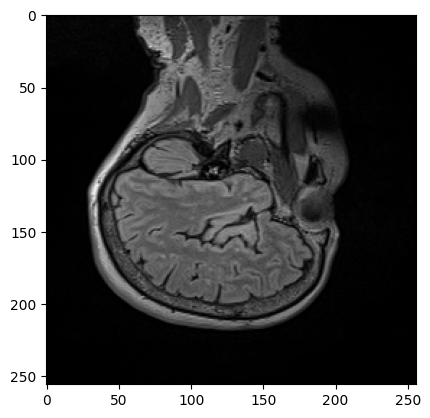

In [38]:
reoriented = sitk.DICOMOrient(data_itk, 'LPI')
flair3 = sitk.GetArrayFromImage(data_itk)
print(flair3.shape)

plt.imshow(flair3[:,:,50],cmap='gray')
plt.show()

In [17]:
import nibabel as nib
import numpy as np

(176, 256, 256)


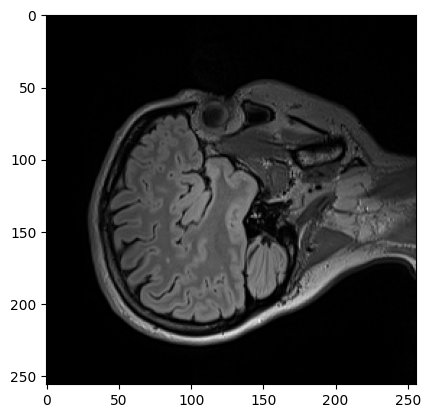

In [41]:
img = nib.load('/localmount/volume-hd/users/uline/data_sets/CVD/0a3a5d79-a26c-4aea-99f4-892751d2baa7/FLAIR.nii.gz')
ornt = np.array([[0, 1],
                [1, -1],
                [2, -1]])

img_orient = img.as_reoriented(ornt)
flair = img_orient.get_fdata()
print(flair.shape)
plt.imshow(flair[50,:,:],cmap='gray')
plt.show()